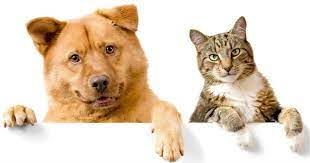

<div style="background-color:#f0f0f0; padding:20px; border-radius:10px; box-shadow: 0px 2px 10px rgba(0, 0, 0, 0.1);">
    <h2 style="color:#333;">Dog and Cat Classifier</h2>
    <p>Check out my end-to-end deployment of the Dog and Cat Classifier model.</p>
    <a href="https://github.com/I-AdityaGoyal/DogCatClassifier_CNN" style="text-decoration:none; color:#0066cc;">
        <button style="background-color:#0066cc; color:#fff; border:none; border-radius:5px; padding:8px 16px; cursor:pointer;">View on GitHub</button>
    </a>
</div>


<div class = "alert alert-info">
    <h1><strong>📦 Importing Dependencies</strong></h1>
</div>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import *
from keras.applications.vgg16 import VGG16

import pickle
import cv2
sns.set_style("darkgrid")

<div class = "alert alert-warning">
    <h2>📂 Getting Data</h2>
</div>

In [2]:
# generators

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

val_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


<div class = "alert alert-danger">
    <h3>🌟 Normalize: Traning Faster</h3>
</div>

In [3]:
def process(image, label):
    image = tf.cast(image/255.,tf.float32)
    return image,label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

<div class = "alert alert-success">
    <h4>Prediction Function</h4>
    <ui><li>This will help to make predictions on new images</li></ui>
</div>

In [17]:
def predict_cnn(test_img):
    test_img = cv2.resize(test_img,(256,256))
    test_input = test_img.reshape((1,256,256,3))
    predictions_cnn = model.predict(test_input)

    if predictions_cnn[0][0] > 0.5:
        print("Prediction: Dog")
    else:
        print("Prediction: Cat")

    plt.imshow(test_img)
    plt.show()

    
    
def predict_vgg(test_img):
    
    test_img = cv2.resize(test_img,(150,150))
    test_input = test_img.reshape((1,150,150,3))
    
    predictions_vgg = vgg.predict(test_input)
    
    if predictions_vgg[0][0] > 0.5:
        print("Prediction: Dog")
    else:
        print("Prediction: Cat")

    plt.imshow(test_img)
    plt.show()

<div class = "alert alert-warning">
    <h2>🤖 Traning CNN</h2>
</div>

In [4]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding = "valid",
                activation = "relu", input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2),strides =2, padding = "valid"))


model.add(Conv2D(64,kernel_size = (3,3),padding = 'valid',
                activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2),strides =2, padding = "valid"))


model.add(Conv2D(128,kernel_size = (3,3),padding = 'valid',
                activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2),strides =2, padding = "valid"))

model.add(Conv2D(150,kernel_size = (3,3),padding = 'valid',
                activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2),strides =2, padding = "valid"))

model.add(Conv2D(180,kernel_size = (3,3),padding = 'valid',
                activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2),strides =2, padding = "valid"))

model.add(Conv2D(250,kernel_size = (3,3),padding = 'valid',
                activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2),strides =2, padding = "valid"))


model.add(Flatten())

model.add(Dense(128,kernel_initializer = "he_normal",activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(64,kernel_initializer = "he_normal",activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(1,kernel_initializer = "glorot_uniform", activation = "sigmoid"))
model.add(Dropout(0.1))

model.compile(optimizer="adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [6]:
history = model.fit(train_ds,epochs=20,validation_data=val_ds)

Epoch 1/20
625/625 [==============================] - 118s 160ms/step - loss: 1.5543 - accuracy: 0.5809 - val_loss: 0.6346 - val_accuracy: 0.6492
Epoch 2/20
625/625 [==============================] - 68s 108ms/step - loss: 1.2915 - accuracy: 0.6637 - val_loss: 0.6274 - val_accuracy: 0.6490
Epoch 3/20
625/625 [==============================] - 70s 112ms/step - loss: 1.3312 - accuracy: 0.6209 - val_loss: 0.6774 - val_accuracy: 0.5658
Epoch 4/20
625/625 [==============================] - 73s 115ms/step - loss: 1.2921 - accuracy: 0.6369 - val_loss: 0.7135 - val_accuracy: 0.5016
Epoch 5/20
625/625 [==============================] - 67s 106ms/step - loss: 1.3303 - accuracy: 0.6406 - val_loss: 0.6767 - val_accuracy: 0.6016
Epoch 6/20
625/625 [==============================] - 78s 125ms/step - loss: 1.2608 - accuracy: 0.7025 - val_loss: 0.5385 - val_accuracy: 0.7324
Epoch 7/20
625/625 [==============================] - 68s 108ms/step - loss: 1.2597 - accuracy: 0.7100 - val_loss: 0.5132 - val_a

<div class = "alert alert-success">
    <h2>📉 Line Plot: Overfitting Check</h2>
</div>

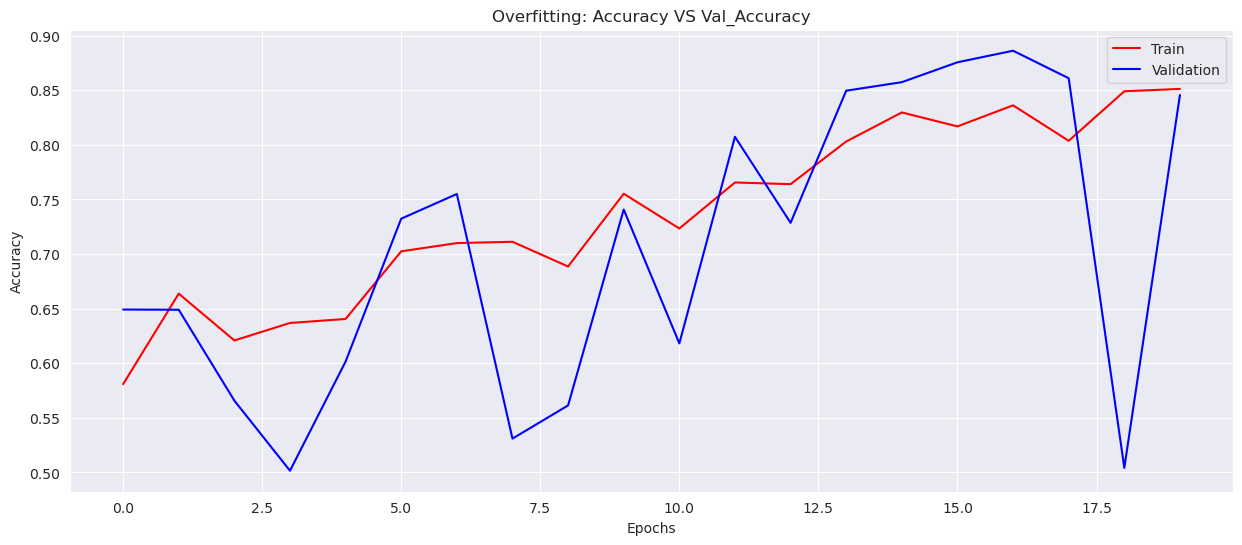

In [7]:
plt.figure(figsize=(15,6))
plt.plot(history.history["accuracy"],color = "red",label = "Train")
plt.plot(history.history["val_accuracy"],color = "blue", label = "Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Overfitting: Accuracy VS Val_Accuracy")
plt.legend()
plt.show()


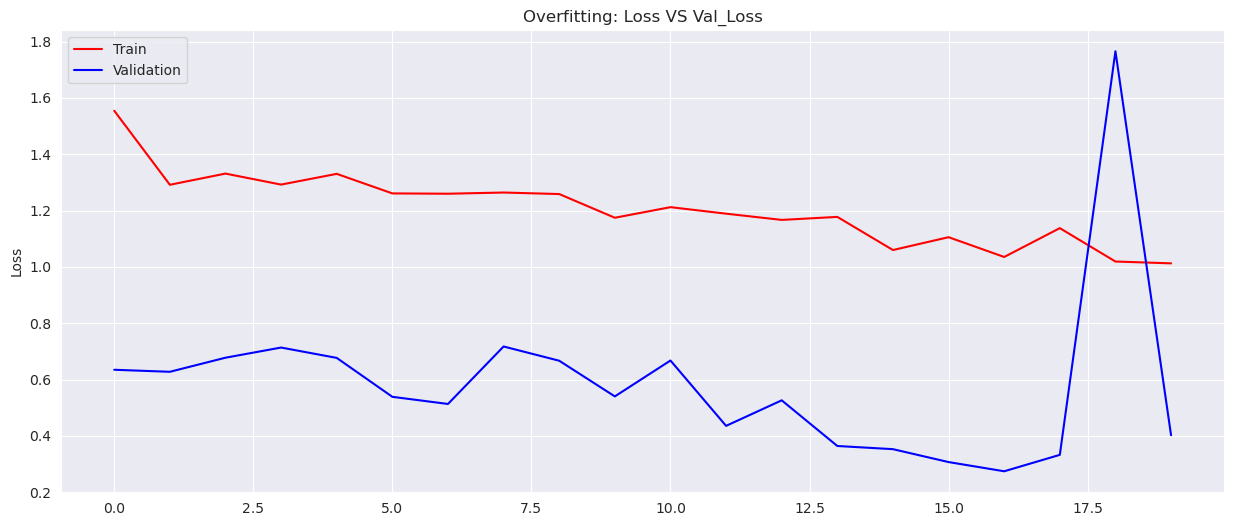

In [8]:
plt.figure(figsize=(15,6))
plt.plot(history.history["loss"],color = "red",label = "Train")
plt.plot(history.history["val_loss"],color = "blue", label = "Validation")
plt.ylabel("Loss")
plt.title("Overfitting: Loss VS Val_Loss")
plt.legend()
plt.show()



1/1 [==============================] - 0s 20ms/step
Prediction: Cat


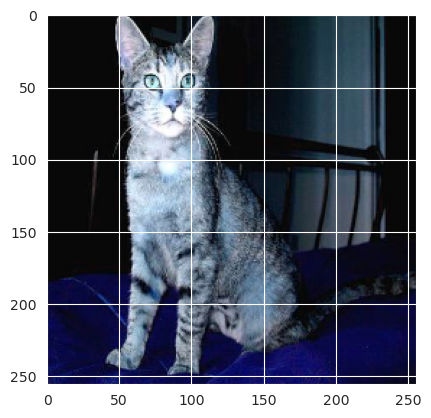

In [27]:
test_img = cv2.imread('/kaggle/input/dogs-vs-cats/test/cats/cat.10000.jpg') # cat image new data 
predict_cnn(test_img)

1/1 [==============================] - 0s 421ms/step
Prediction: Cat


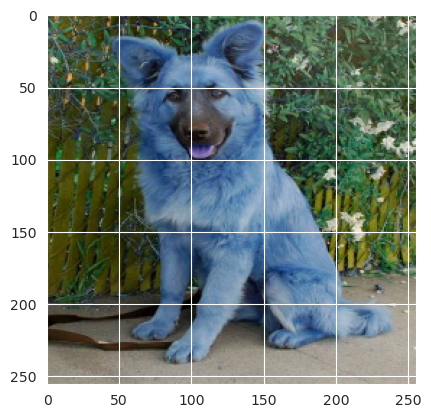

In [26]:
test_img = cv2.imread('/kaggle/input/dogs-vs-cats/test/dogs/dog.10014.jpg') # dog image new data 
predict_cnn(test_img)

- This is not a perfect model. Let's try Something Else!!!

<div class = "alert alert-danger">
    <h1>🔰 Transfer Learning</h1>
</div>

<div class = "alert alert-warning">
    <h3>📚 Feature Extraction</h3>
</div>

<div class = "alert alert-info">
    <p># Using famous VGG16 pretrained Model on ImageNET dataset, preformed well on ILSVRC challenge with the error rate of 7.3%</p>
</div>

<div class = "alert alert-success">
    <h2>🤖 Traning VGG16: Feature Extraction</h2>
   </div>

In [10]:
conv_base = VGG16(weights = "imagenet",
                 include_top = False,     # removing FC Layers
                 input_shape = (150,150,3)
                 )

58889256/58889256 [==============================] - 0s 0us/step


In [11]:
vgg = Sequential()

vgg.add(conv_base)
vgg.add(Flatten())


vgg.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
vgg.add(Dropout(0.2))
vgg.add(Dense(256, kernel_initializer='he_normal', activation='relu'))
vgg.add(Dropout(0.2))
vgg.add(Dense(128, kernel_initializer='he_normal', activation='relu'))
vgg.add(Dropout(0.2))
vgg.add(Dense(64, kernel_initializer='he_normal', activation='relu'))
vgg.add(Dropout(0.2))
vgg.add(Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid'))


vgg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               4194816   
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)              

In [12]:
conv_base.trainable = False

<div class = "alert alert-success">
    <h4>Data Augmentation</h4>
</div>

In [14]:
batch_size = 32

train_dg = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True)
test_dg = ImageDataGenerator(rescale = 1./255)

train_gen = train_dg.flow_from_directory('/kaggle/input/dogs-vs-cats/train',
                                        target_size = (150,150),
                                        batch_size = batch_size,
                                        class_mode = "binary")

test_gen = test_dg.flow_from_directory('/kaggle/input/dogs-vs-cats/test',
                                        target_size = (150,150),
                                        batch_size = batch_size,
                                        class_mode = "binary")

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [15]:
vgg.compile(optimizer="adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [16]:
history2 = vgg.fit_generator(train_gen,
                            epochs=20,
                            validation_data = test_gen)

Epoch 1/20
625/625 [==============================] - 174s 270ms/step - loss: 0.3634 - accuracy: 0.8388 - val_loss: 0.2498 - val_accuracy: 0.9044
Epoch 2/20
625/625 [==============================] - 170s 272ms/step - loss: 0.2732 - accuracy: 0.8852 - val_loss: 0.2281 - val_accuracy: 0.9098
Epoch 3/20
625/625 [==============================] - 168s 269ms/step - loss: 0.2457 - accuracy: 0.8978 - val_loss: 0.2024 - val_accuracy: 0.9102
Epoch 4/20
625/625 [==============================] - 171s 274ms/step - loss: 0.2337 - accuracy: 0.9014 - val_loss: 0.1962 - val_accuracy: 0.9144
Epoch 5/20
625/625 [==============================] - 171s 274ms/step - loss: 0.2224 - accuracy: 0.9057 - val_loss: 0.2154 - val_accuracy: 0.9080
Epoch 6/20
625/625 [==============================] - 170s 273ms/step - loss: 0.2166 - accuracy: 0.9103 - val_loss: 0.2021 - val_accuracy: 0.9118
Epoch 7/20
625/625 [==============================] - 172s 275ms/step - loss: 0.2126 - accuracy: 0.9136 - val_loss: 0.1976 -

<div class = "alert alert-success">
    <h2>📉 Line Plot: Overfitting Check</h2>
</div>

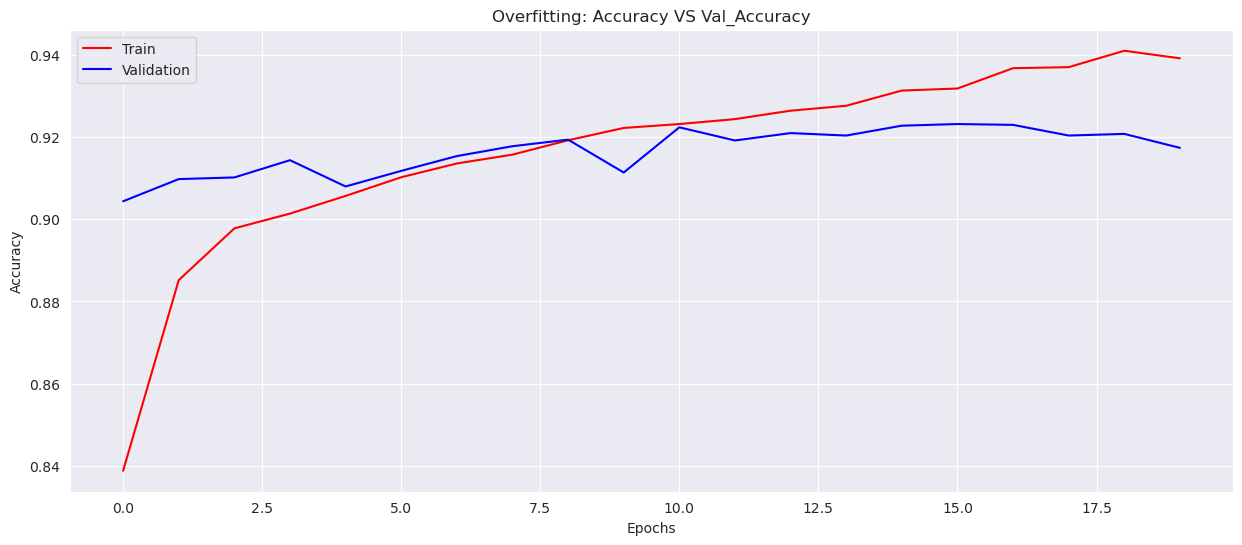

In [21]:
plt.figure(figsize=(15,6))
plt.plot(history2.history["accuracy"],color = "red",label = "Train")
plt.plot(history2.history["val_accuracy"],color = "blue", label = "Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Overfitting: Accuracy VS Val_Accuracy")
plt.legend()
plt.show()


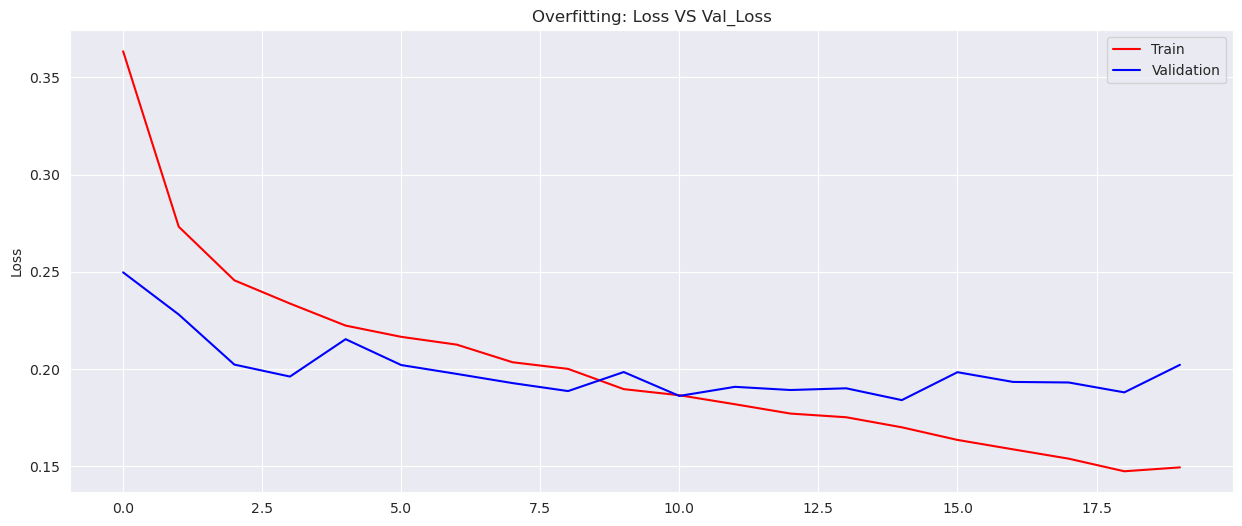

In [22]:
plt.figure(figsize=(15,6))
plt.plot(history2.history["loss"],color = "red",label = "Train")
plt.plot(history2.history["val_loss"],color = "blue", label = "Validation")
plt.ylabel("Loss")
plt.title("Overfitting: Loss VS Val_Loss")
plt.legend()
plt.show()



1/1 [==============================] - 1s 746ms/step
Prediction: Cat


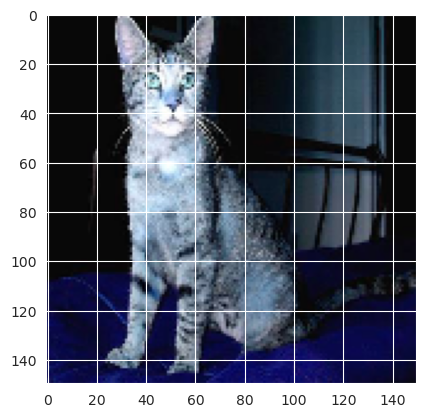

In [23]:
test_img = cv2.imread('/kaggle/input/dogs-vs-cats/test/cats/cat.10000.jpg')  # cat image new data 
predict_vgg(test_img)

1/1 [==============================] - 0s 20ms/step
Prediction: Dog


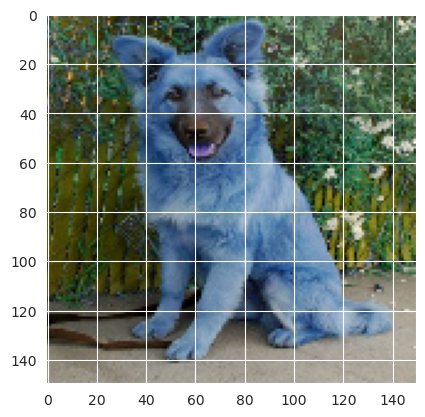

In [24]:
test_img = cv2.imread('/kaggle/input/dogs-vs-cats/test/dogs/dog.10014.jpg')  # dog image new data 
predict_vgg(test_img)

<div class = "alert alert-success">
    <h3>Perfect!!!</h3>
    <ui><li> Predicting Both Classes</li></ui>
</div>

In [28]:
import pickle
from keras.models import load_model

with open('trained_model.pickle', 'wb') as f:
    pickle.dump(vgg, f)

vgg.save('trained_model.h5')


<div style="background-color:#f0f0f0; padding:20px; border-radius:10px; box-shadow: 0px 2px 10px rgba(0, 0, 0, 0.1);">
    <h2 style="color:#333;">Dog and Cat Classifier</h2>
    <p>Check out my end-to-end deployment of the Dog and Cat Classifier model.</p>
    <a href="https://github.com/I-AdityaGoyal/DogCatClassifier_CNN" style="text-decoration:none; color:#0066cc;">
        <button style="background-color:#0066cc; color:#fff; border:none; border-radius:5px; padding:8px 16px; cursor:pointer;">View on GitHub</button>
    </a>
</div>
